In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)

In [2]:
df = pd.read_csv("spaceship_train.csv")
test = pd.read_csv("spaceship_test.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df['HomePlanet'].value_counts()
#this shouldn't allow any NA

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [5]:
df['CryoSleep'].value_counts()
#this shouldn't allow any NA

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [6]:
df['Cabin'].value_counts()
#Takes the form deck/num/side, where side can be either P for Port or S for Starboard. Remove the other info in it

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [7]:
df['Cabin'] = df['Cabin'].str[2:]

In [8]:
df['Cabin'] = df['Cabin'].str.split('/', n=1).str.get(-1)

In [9]:
df['Cabin'].value_counts()

S    4288
P    4206
Name: Cabin, dtype: int64

In [10]:
df['Destination'].value_counts()
#this would benefit from simpler wording

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [11]:
df['Destination'] = df['Destination'].replace('TRAPPIST-1e', 'T')
df['Destination'] = df['Destination'].replace('55 Cancri e', 'C')
df['Destination'] = df['Destination'].replace('PSO J318.5-22', 'P')

In [12]:
df['Destination'].value_counts()

T    5915
C    1800
P     796
Name: Destination, dtype: int64

In [13]:
df['VIP'].value_counts()
#this is probably comparable to class in the original titanic competition, which was very relevant

False    8291
True      199
Name: VIP, dtype: int64

In [14]:
df['RoomService'].value_counts()
#Amount the passenger has billed at each of the Spaceship Titanics many luxury amenities.
#Same for FoodCourt, ShoppingMall, Spa, VRDeck

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64

In [15]:
df = df.drop(['Name'], axis=1)
#name should not be relevant

In [16]:
df.isnull().values.any()

True

In [17]:
for col in df.columns:
    missing_data = np.mean(df[col].isnull())
    print(col,missing_data)

#some msising data in all but passengerID and Transported, need to get those IDs

PassengerId 0.0
HomePlanet 0.023122052225928908
CryoSleep 0.02496261359714713
Cabin 0.02289198205452663
Destination 0.02093638559760727
Age 0.020591280340503854
VIP 0.023352122397331185
RoomService 0.02082135051190613
FoodCourt 0.021051420683308408
ShoppingMall 0.02392729782583688
Spa 0.021051420683308408
VRDeck 0.021626596111814105
Transported 0.0


In [18]:
df[df.isna().any(axis=1)]
#HomePlanet, Age, and  Destination should not have any NaNs, will exclude them.
#Replace NaN in VIP and CryoSleep with False
#Not having a Cabin is reasonable
#Convert NaN in the spending columns to 0

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
7,0006_02,Earth,True,S,T,28.0,False,0.0,0.0,0.0,0.0,NaN,True
10,0008_02,Europa,True,P,T,34.0,False,0.0,0.0,NaN,0.0,0.0,True
15,0012_01,Earth,False,NaN,T,31.0,False,32.0,0.0,876.0,0.0,0.0,False
16,0014_01,Mars,False,P,C,27.0,False,1286.0,122.0,NaN,0.0,0.0,False
23,0020_03,Earth,True,S,C,29.0,False,0.0,0.0,NaN,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,P,T,29.0,False,0.0,2972.0,NaN,28.0,188.0,True
8674,9257_01,NaN,False,P,T,13.0,False,39.0,0.0,1085.0,24.0,0.0,False
8675,9259_01,Earth,NaN,P,T,44.0,False,1030.0,1015.0,0.0,11.0,NaN,True
8684,9274_01,NaN,True,P,T,23.0,False,0.0,0.0,0.0,0.0,0.0,True


In [19]:
df = df[df['HomePlanet'].notna()]
df = df[df['Age'].notna()]
df = df[df['Destination'].notna()]

In [20]:
df['CryoSleep'] = df['CryoSleep'].fillna(False)
df['VIP'] = df['VIP'].fillna(False)
df['RoomService'] = df['RoomService'].fillna(0)
df['FoodCourt'] = df['FoodCourt'].fillna(0)
df['ShoppingMall'] = df['ShoppingMall'].fillna(0)
df['Spa'] = df['Spa'].fillna(0)
df['VRDeck'] = df['VRDeck'].fillna(0)
df['Cabin'] = df['Cabin'].fillna('None')

In [21]:
df[df.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported


In [22]:
df["Count"] = 1
p = pd.pivot_table(df, values="Count", index='HomePlanet', columns='Transported',
                          aggfunc='count')
p
#50/50 for Mars, better odds for Europa, worse odds for Earth

Transported,False,True
HomePlanet,,
Earth,2540,1875
Europa,699,1350
Mars,801,875


In [23]:
v = pd.pivot_table(df, values="Count", index='VIP', columns='Transported',
                          aggfunc='count')
v
#doesn't seem to make a massive difference

Transported,False,True
VIP,,
False,3923,4026
True,117,74


In [24]:
d = pd.pivot_table(df, values="Count", index='Destination', columns='Transported',
                          aggfunc='count')
d

#Better odds for C, 50/50 for P, worse odds for T

Transported,False,True
Destination,,
C,680,1055
P,382,384
T,2978,2661


In [25]:
c = pd.pivot_table(df, values="Count", index='CryoSleep', columns='Transported',
                          aggfunc='count')
c

#A lot better for True, a lot worse for False

Transported,False,True
CryoSleep,,
False,3517,1786
True,523,2314


In [26]:
ca = pd.pivot_table(df, values="Count", index='Cabin', columns='Transported',
                          aggfunc='count')
ca

Transported,False,True
Cabin,,
None,91,94
P,2170,1778
S,1779,2228


In [27]:
print(3517/(3517+1786))
print(523/(523+2314))

0.6632095040543089
0.1843496651392316


In [28]:
p = p.reset_index()
v = v.reset_index()
d = d.reset_index()
c = c.reset_index()
ca = ca.reset_index()

<AxesSubplot:xlabel='CryoSleep'>

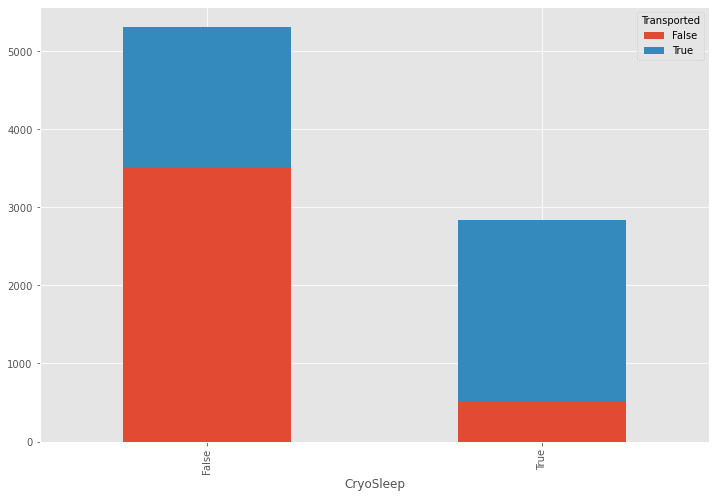

In [29]:
c.set_index('CryoSleep').plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='HomePlanet'>

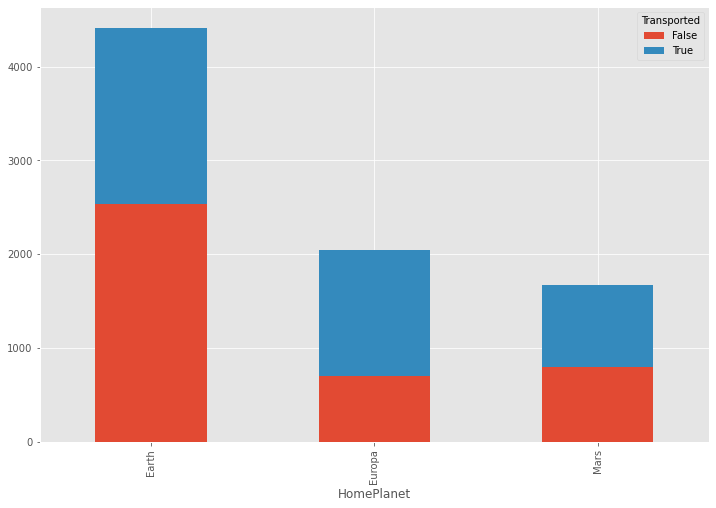

In [30]:
p.set_index('HomePlanet').plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Destination'>

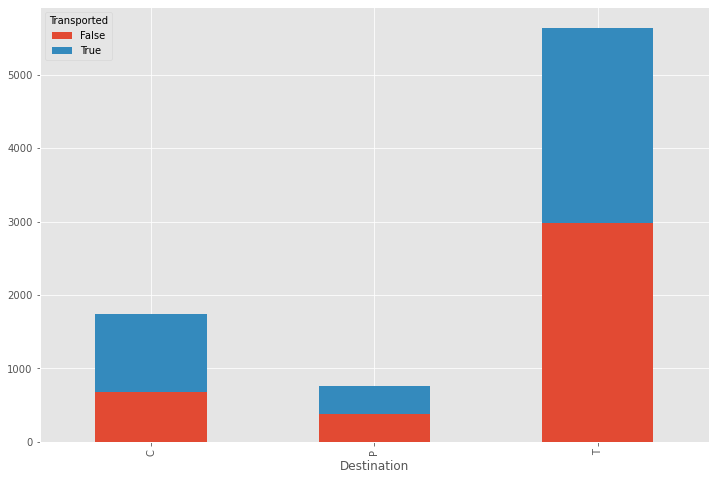

In [31]:
d.set_index('Destination').plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='VIP'>

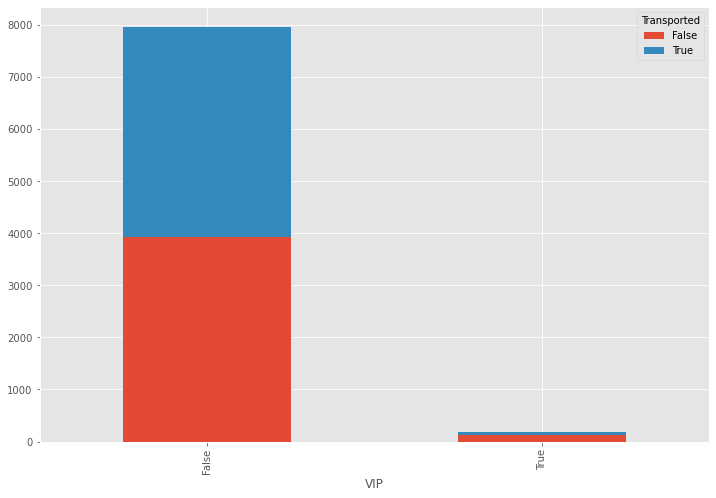

In [32]:
v.set_index('VIP').plot(kind='bar', stacked=True)

In [33]:
a = pd.pivot_table(df, values="Count", index='Age', columns='Transported',
                          aggfunc='count')
a

Transported,False,True
Age,,
0.0,31.0,141.0
1.0,18.0,48.0
2.0,22.0,50.0
3.0,16.0,57.0
4.0,18.0,52.0
...,...,...
75.0,2.0,2.0
76.0,1.0,1.0
77.0,1.0,1.0


In [34]:
a = a.reset_index()

In [35]:
a

Transported,Age,False,True
0,0.0,31.0,141.0
1,1.0,18.0,48.0
2,2.0,22.0,50.0
3,3.0,16.0,57.0
4,4.0,18.0,52.0
...,...,...,...
75,75.0,2.0,2.0
76,76.0,1.0,1.0
77,77.0,1.0,1.0
78,78.0,2.0,1.0


<AxesSubplot:xlabel='Age'>

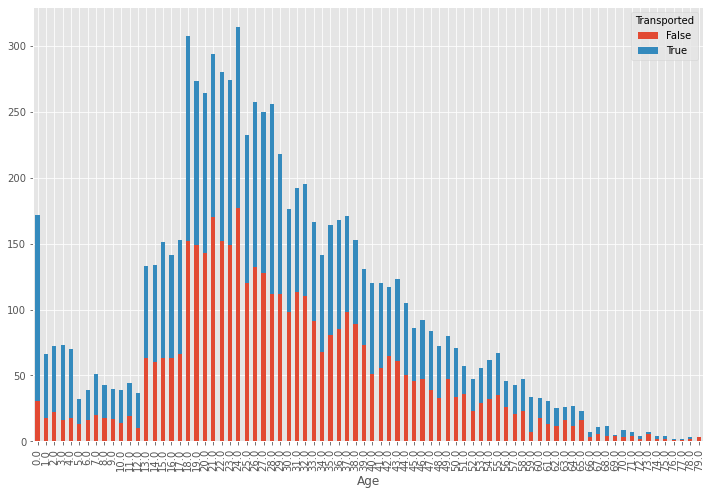

In [36]:
a.set_index('Age').plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Cabin'>

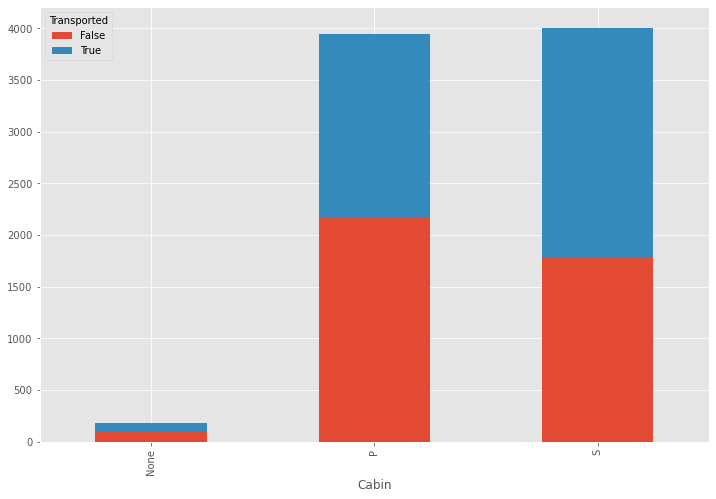

In [37]:
ca.set_index('Cabin').plot(kind='bar', stacked=True)

In [38]:
df = df.drop(['Count'], axis=1)

In [39]:
#corr matrix
df_num = df
for col_name in df_num.columns:
    if(df_num[col_name].dtype == "object"):
        df_num[col_name] = df_num[col_name].astype("category")
        df_num[col_name] = df_num[col_name].cat.codes
        
df_num

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,1,False,1,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,1,0,False,2,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,2,1,False,2,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,3,1,False,2,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,4,0,False,2,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8135,1,False,1,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,8136,0,True,2,1,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,8137,0,False,2,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,8138,1,False,2,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [40]:
df['Spending'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

In [41]:
df_num.corr()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Spending
PassengerId,1.000000,-0.006632,-0.003644,0.007107,-0.009463,-0.010319,0.014304,-0.002000,-0.009664,0.020858,-0.006661,0.014508,0.029090,0.001728
HomePlanet,-0.006632,1.000000,0.082696,-0.004530,0.038936,0.136447,0.128593,0.214092,0.071185,0.103700,0.054965,0.041259,0.117039,0.152345
CryoSleep,-0.003644,0.082696,1.000000,0.006145,-0.092401,-0.075767,-0.079314,-0.241976,-0.205461,-0.207607,-0.199292,-0.191214,0.456369,-0.376239
Cabin,0.007107,-0.004530,0.006145,1.000000,-0.003871,0.008689,-0.014477,-0.022275,0.018206,-0.011568,-0.006341,-0.003283,0.094585,-0.001148
Destination,-0.009463,0.038936,-0.092401,-0.003871,1.000000,-0.006785,-0.044033,0.047072,-0.107333,0.026570,-0.056853,-0.074636,-0.107710,-0.097527
Age,-0.010319,0.136447,-0.075767,0.008689,-0.006785,1.000000,0.090472,0.070647,0.127590,0.033373,0.123881,0.100606,-0.077877,0.186928
VIP,0.014304,0.128593,-0.079314,-0.014477,-0.044033,0.090472,1.000000,0.052915,0.124280,0.019490,0.064450,0.123472,-0.036041,0.163711
RoomService,-0.002000,0.214092,-0.241976,-0.022275,0.047072,0.070647,0.052915,1.000000,-0.013535,0.050747,0.012863,-0.017504,-0.239509,0.238231
FoodCourt,-0.009664,0.071185,-0.205461,0.018206,-0.107333,0.127590,0.124280,-0.013535,1.000000,-0.013837,0.223971,0.215346,0.048393,0.743811
ShoppingMall,0.020858,0.103700,-0.207607,-0.011568,0.026570,0.033373,0.019490,0.050747,-0.013837,1.000000,0.014254,-0.006322,0.010798,0.221723


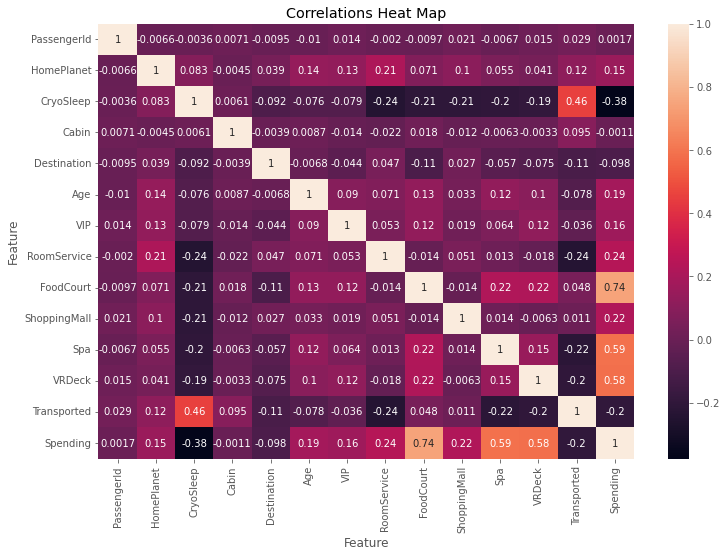

In [42]:
corr_matrix = df_num.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlations Heat Map")
plt.xlabel("Feature")
plt.ylabel("Feature")
plt.show()

In [43]:
df['Any_Spending'] = (df['Spending'] > 0)

In [44]:
awake = df[df.CryoSleep == False]

In [45]:
awake.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Spending,Any_Spending
0,0,1,False,1,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,False
1,1,0,False,2,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,True
2,2,1,False,2,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,True
3,3,1,False,2,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,True
4,4,0,False,2,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,True


In [46]:
awake.corr()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Spending,Any_Spending
PassengerId,1.000000,-0.017789,NaN,0.000215,-0.006509,-0.002531,0.009797,-0.003691,-0.013222,0.025537,-0.009368,0.017486,0.018333,0.000479,0.011839
HomePlanet,-0.017789,1.000000,NaN,-0.019486,0.029946,0.116088,0.171793,0.300015,0.112034,0.153643,0.090658,0.072301,-0.008014,0.246217,-0.018150
CryoSleep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabin,0.000215,-0.019486,NaN,1.000000,-0.002463,0.002308,-0.021580,-0.026784,0.024869,-0.013153,-0.006527,-0.002685,0.108140,0.001570,-0.002413
Destination,-0.006509,0.029946,NaN,-0.002463,1.000000,-0.002361,-0.056801,0.032470,-0.164544,0.009627,-0.097918,-0.119885,-0.051343,-0.182024,-0.009462
Age,-0.002531,0.116088,NaN,0.002308,-0.002361,1.000000,0.100624,0.068736,0.145931,0.022994,0.141523,0.111856,-0.109103,0.217987,0.418999
VIP,0.009797,0.171793,NaN,-0.021580,-0.056801,0.100624,1.000000,0.036898,0.117141,0.003282,0.052699,0.117144,-0.008111,0.153393,0.040186
RoomService,-0.003691,0.300015,NaN,-0.026784,0.032470,0.068736,0.036898,1.000000,-0.066610,0.000539,-0.037189,-0.066962,-0.174365,0.163728,0.148321
FoodCourt,-0.013222,0.112034,NaN,0.024869,-0.164544,0.145931,0.117141,-0.066610,1.000000,-0.059009,0.190842,0.183278,0.190390,0.735047,0.124860
ShoppingMall,0.025537,0.153643,NaN,-0.013153,0.009627,0.022994,0.003282,0.000539,-0.059009,1.000000,-0.028292,-0.047929,0.141417,0.158454,0.126222


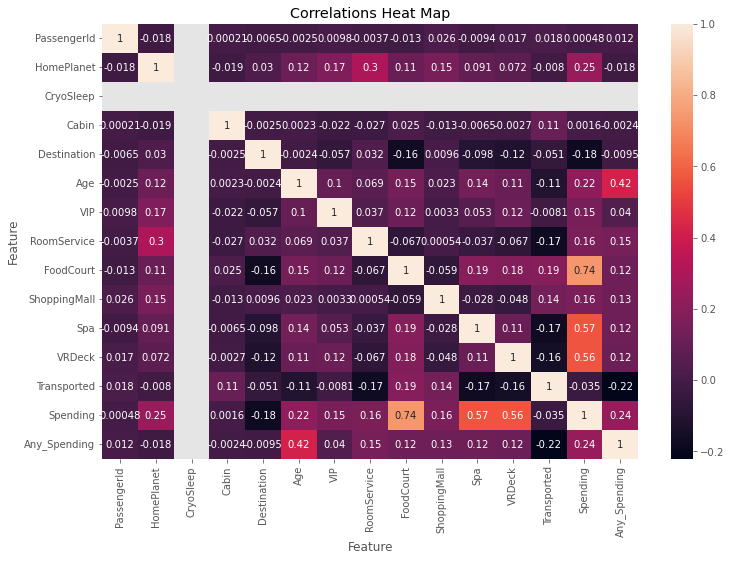

In [47]:
corr_matrix = awake.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlations Heat Map")
plt.xlabel("Feature")
plt.ylabel("Feature")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Spending'>

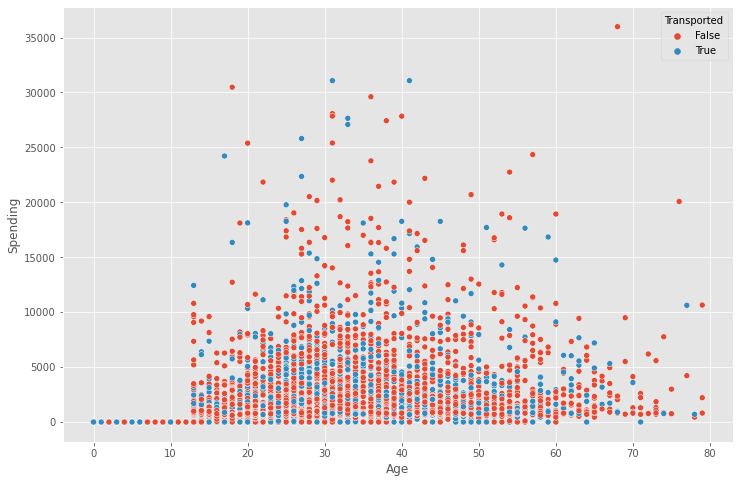

In [48]:
sns.scatterplot(data=awake, x="Age", y="Spending", hue="Transported")

In [49]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Spending,Any_Spending
0,0,1,False,1,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,False
1,1,0,False,2,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,True
2,2,1,False,2,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,True
3,3,1,False,2,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,True
4,4,0,False,2,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,True


In [ ]:
#try logistic regression, k-nearest neighbour, and decision tree
#with features: Cryo Sleep, Cabin, and Any_Spending

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X=df[['CryoSleep', 'Cabin', 'Any_Spending']]
y=df[['Transported']]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

reg = LogisticRegression().fit(train_X, train_y.values.ravel())

In [51]:
#Model validation
#note to self: use mean_squared_error where the problem from being further off the true value increases with distance
#not needed here because it's binary either right or wrong
from sklearn.metrics import mean_absolute_error
val_predictions = reg.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

0.2805896805896806


In [56]:
score = reg.score(train_X, train_y)
print(score)

0.7408681408681409


In [57]:
from sklearn.tree import DecisionTreeRegressor
decision_model = DecisionTreeRegressor(random_state=1)
decision_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [58]:
val_predictions = decision_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

0.3801255361679732


In [59]:
score = decision_model.score(train_X, train_y)
print(score)

0.25465814639782147


In [61]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_X, train_y.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [62]:
val_predictions = neigh.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

0.3415233415233415


In [63]:
score = neigh.score(train_X, train_y)
print(score)

0.6511056511056511


In [ ]:
#logistic regression had the lowest error

In [64]:
#try adding in more features to see whether that improves the score
X_more=df[['CryoSleep', 'Cabin', 'Any_Spending', 'Destination', 'Age']]
train_X_more, val_X_more, train_y, val_y = train_test_split(X_more, y, random_state = 2)
reg_more = LogisticRegression().fit(train_X_more, train_y.values.ravel())

In [65]:
val_predictions = reg_more.predict(val_X_more)
print(mean_absolute_error(val_y, val_predictions))

0.26388206388206387


In [66]:
score = reg_more.score(train_X_more, train_y)
print(score)

0.7352989352989353


In [67]:
#try fewer features
X_less=df[['CryoSleep', 'Any_Spending']]
train_X_less, val_X_less, train_y, val_y = train_test_split(X_less, y, random_state = 3)
reg_less = LogisticRegression().fit(train_X_less, train_y.values.ravel())

In [68]:
val_predictions = reg_less.predict(val_X_less)
print(mean_absolute_error(val_y, val_predictions))

0.2520884520884521


In [69]:
score = reg_less.score(train_X_less, train_y)
print(score)

0.7313677313677314


In [70]:
#try spending features
X_spending=df[['CryoSleep', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
train_X_spending, val_X_spending, train_y, val_y = train_test_split(X_spending, y, random_state = 5)
reg_spending = LogisticRegression().fit(train_X_spending, train_y.values.ravel())

In [71]:
val_predictions = reg_spending.predict(val_X_spending)
print(mean_absolute_error(val_y, val_predictions))

0.23292383292383292


In [72]:
score = reg_spending.score(train_X_spending, train_y)
print(score)

0.7769041769041769


In [75]:
#try all features with correlation above 0.1
X_all=df[['CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'HomePlanet', 'Destination']]
train_X_all, val_X_all, train_y, val_y = train_test_split(X_all, y, random_state = 5)
reg_all = LogisticRegression().fit(train_X_all, train_y.values.ravel())

In [76]:
val_predictions = reg_all.predict(val_X_all)
print(mean_absolute_error(val_y, val_predictions))

0.2457002457002457


In [83]:
score = reg_all.score(train_X_all, train_y)
print(score)

0.7575757575757576


In [81]:
#Grid Search Cross Validation
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1"], "solver": ['liblinear']}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(train_X_spending, train_y.values.ravel())

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.7773899278259238


In [84]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [85]:
test['CryoSleep'] = test['CryoSleep'].fillna(False)
test['RoomService'] = test['RoomService'].fillna(0)
test['FoodCourt'] = test['FoodCourt'].fillna(0)
test['ShoppingMall'] = test['ShoppingMall'].fillna(0)
test['Spa'] = test['Spa'].fillna(0)
test['VRDeck'] = test['VRDeck'].fillna(0)

In [86]:
test = test
for col_name in test.columns:
    if(test[col_name].dtype == "object"):
        test[col_name] = test[col_name].astype("category")
        test[col_name] = test[col_name].cat.codes
        
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0,0,True,2784,2,27.0,0,0.0,0.0,0.0,0.0,0.0,2912
1,1,0,False,1867,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,2406
2,2,1,True,257,0,31.0,0,0.0,0.0,0.0,0.0,0.0,3376
3,3,1,False,259,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,2711
4,4,0,False,1940,2,20.0,0,10.0,0.0,635.0,0.0,0.0,668


In [87]:
X_test = test[['CryoSleep', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

In [88]:
test['Transported'] = logreg_cv.predict(X_test)
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0,True,2784,2,27.0,0,0.0,0.0,0.0,0.0,0.0,2912,True
1,1,0,False,1867,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,2406,False
2,2,1,True,257,0,31.0,0,0.0,0.0,0.0,0.0,0.0,3376,True
3,3,1,False,259,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,2711,True
4,4,0,False,1940,2,20.0,0,10.0,0.0,635.0,0.0,0.0,668,True


In [95]:
test = test[['PassengerId','Transported']]

In [97]:
test.to_csv('spaceship_titanic_prediction.csv', index = False)